# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
import os
import pickle
from sklearn.utils import shuffle
import cv2
import numpy as np
import os
import sklearn
import tensorflow as tf
import sys
from tqdm import tqdm
from sklearn.metrics import confusion_matrix
from matplotlib import __version__ as plt__version
from math import ceil, pow
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

A4_PORTRAIT = (8.27, 11.69)
A4_LANDSCAPE = A4_PORTRAIT[::-1]

os.chdir('.')
base_path = os.path.abspath('.')
data_dir = os.path.join(base_path, 'traffic-signs-data')

training_file = os.path.join(data_dir, 'train.p')
validation_file= os.path.join(data_dir, 'valid.p')
testing_file = os.path.join(data_dir, 'test.p')

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
x_train, y_train = train['features'], train['labels']
x_valid, y_valid = valid['features'], valid['labels']
x_test, y_test = test['features'], test['labels']
signnames = pd.read_csv('signnames.csv')['SignName']

y_train = y_train.astype('int32')
y_valid = y_valid.astype('int32')
y_test = y_test.astype('int32')

assert(len(x_train) == len(y_train))
assert(len(x_valid) == len(y_valid))
assert(len(x_test) == len(y_test))

C:\Users\diyer\AppData\Local\Continuum\anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
# TODO: Number of training examples
n_train = len(x_train)

# TODO: Number of validation examples
n_validation = len(x_valid)

# TODO: Number of testing examples.
n_test = len(x_test)

# TODO: What's the shape of an traffic sign image?
image_shape = x_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

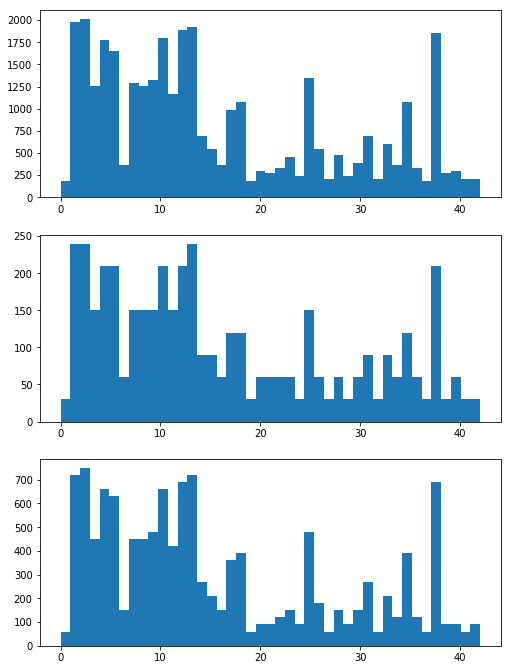

In [3]:
f, axes = plt.subplots(3, 1)
f.set_size_inches(A4_PORTRAIT)
for i, dataset in enumerate([y_train, y_valid, y_test]):
    axes[i].hist(dataset, bins=n_classes)

In [4]:
# n = 10  # Examples to display

# for c in range(n_classes):  # Iterate all classes
#     idx = np.where(y_train == c)  # Find index for class
#     n_images = x_train[np.random.choice(idx[0], n)]  # Pick n random images to display
#     f, axes = plt.subplots(1, n)
#     f.set_size_inches(A4_LANDSCAPE)
#     print(signnames[c])
#     for i, image in enumerate(n_images):
#         axes[i].imshow(image)
#         axes[i].grid(False)
#         axes[i].axis('off')
#     plt.show()

[[24 23 24 26 27 30 39 33 24 38 66 85 75 84 91 98 95 84 73 64 55 39 34 39
  39 29 27 27 27 28 28 28]]
[[ 25  24  25  26  27  30  41  36  28  41  68  86  75  84  92 100  97  85
   75  67  60  45  40  43  42  32  29  28  29  29  29  29]]


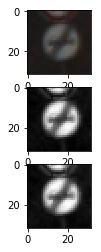

In [5]:
import cv2

a = x_train[1]
b = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
c = cv2.split(cv2.cvtColor(a, cv2.COLOR_RGB2YUV))[0]

plt.figure()
f, axes = plt.subplots(3, 1)
axes[0].imshow(a)
axes[1].imshow(b, cmap='gray')
axes[2].imshow(c, cmap='gray')

print(b[:1])
print(c[:1])

[-0.95294118 -0.97647059 -0.95294118 -0.90588235 -0.88235294 -0.81176471
 -0.6        -0.74117647 -0.95294118 -0.62352941  0.03529412  0.48235294
  0.24705882  0.45882353  0.62352941  0.78823529  0.71764706  0.45882353
  0.2        -0.01176471 -0.22352941 -0.6        -0.71764706 -0.6
 -0.6        -0.83529412 -0.88235294 -0.88235294 -0.88235294 -0.85882353
 -0.85882353 -0.85882353]
[-0.40588236 -0.40980393 -0.40588236 -0.39803922 -0.39411765 -0.38235295
 -0.34705883 -0.37058824 -0.40588236 -0.3509804  -0.24117646 -0.16666666
 -0.20588234 -0.17058823 -0.14313725 -0.11568627 -0.12745097 -0.17058823
 -0.21372548 -0.2490196  -0.28431374 -0.34705883 -0.36666667 -0.34705883
 -0.34705883 -0.38627452 -0.39411765 -0.39411765 -0.39411765 -0.39019608
 -0.39019608 -0.39019608]


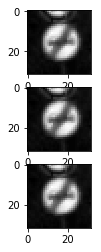

In [6]:
def normalize1(image):
    mini, maxi = np.min(image), np.max(image)
    return (image - mini) / (maxi - mini) * 2 - 1

def normalize2(image):
    return (image.astype(np.float32)/255.0) - 0.5

bn1 = normalize1(b)
bn2 = normalize2(b)

print(bn1[0])
print(bn2[0])


plt.figure()
f, axes = plt.subplots(3, 1)
axes[0].imshow(b, cmap='gray')
axes[1].imshow(bn1, cmap='gray')
axes[2].imshow(bn2, cmap='gray')

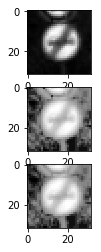

In [7]:
def equalize(image):
    return cv2.equalizeHist(image)

be = equalize(b)
ce = equalize(c)

plt.figure()
f, axes = plt.subplots(3, 1)
axes[0].imshow(b, cmap='gray')
axes[1].imshow(be, cmap='gray')
axes[2].imshow(ce, cmap='gray')

In [8]:
## Preprocessing the data

def grayscale(image):
#     return cv2.split(cv2.cvtColor(image, cv2.COLOR_RGB2YUV))[0]
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

def equalize(image):
    return cv2.equalizeHist(image)

def normalize_im(image):
#     mini, maxi = np.min(image), np.max(image)
#     return (image - mini) / (maxi - mini) * 2 - 1
    return (image.astype(np.float32)/255.0) - 0.5

def preprocess_im(image):
    return np.expand_dims(normalize_im(equalize(grayscale(image))), axis=2)

def preprocess(dataset):
    return np.array([preprocess_im(im) for im in dataset])

x_train_n = preprocess(x_train)
x_valid_n = preprocess(x_valid)
x_test_n = preprocess(x_test)

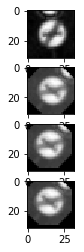

In [9]:
def rotate(image, angle=15):
    angle = np.random.randint(-angle, angle)
    M = cv2.getRotationMatrix2D((16, 16), angle, 1)
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))

def translate(image, pixels=2):
    tx = np.random.choice(range(-pixels, pixels))
    ty = np.random.choice(range(-pixels, pixels))
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))

def random_bright(image):
    eff = 0.5 + np.random.random()
    return image * eff

br = rotate(b, 45)
bt = translate(br)
bb = random_bright(bt)

plt.figure()
f, axes = plt.subplots(4, 1)
axes[0].imshow(b, cmap='gray')
axes[1].imshow(br, cmap='gray')
axes[2].imshow(bt, cmap='gray')
axes[3].imshow(bb, cmap='gray')

In [10]:
## Augmenting training data

def rotate(image, angle=15):
    angle = np.random.randint(-angle, angle)
    M = cv2.getRotationMatrix2D((16, 16), angle, 1)
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))


def translate(image, pixels=2):
    tx = np.random.choice(range(-pixels, pixels))
    ty = np.random.choice(range(-pixels, pixels))
    M = np.float32([[1, 0, tx], [0, 1, ty]])
    return cv2.warpAffine(src=image, M=M, dsize=(32, 32))


def random_bright(image):
    eff = 0.5 + np.random.random()
    return image * eff

def generate(images, count):
    generated = []
    while True:
        for image in images:
            if len(generated) == count:
                return generated
            image = random_bright(image)
            image = rotate(image)
            image = translate(image)
            image = normalize_im(image)
            generated.append(np.expand_dims(image, axis=2))


unique, counts = np.unique(y_train, return_counts=True)

target = 5000
x_augmented = []
y_augmented = []

for cls, count in tqdm(list(zip(unique, counts)), 'Augmenting training dataset'):
    diff = target - count
    x_augmented += generate(x_train_n[np.where(y_train == cls)[0]], diff)
    y_augmented += [cls for _ in range(diff)]

x_train_n = np.concatenate([x_train_n, np.array(x_augmented)])
y_train = np.concatenate([y_train, np.array(y_augmented)])
n_train = y_train.size
print('Final number of training examples', n_train)

Augmenting training dataset: 100%|██████████| 43/43 [00:15<00:00,  2.85it/s]


Final number of training examples 215000


In [11]:
# f, axes = plt.subplots(11, 4)
# f.set_size_inches(A4_PORTRAIT)
# c = 0
# for row in axes:
#     for ax in row:
#         if c < n_classes:
#             im = (x_train_n[np.random.choice(np.where(y_train == c)[0], 1)] + 1) / 2
#             ax.imshow(im[0,:,:,0], cmap='gray')
#         ax.grid(False)
#         ax.axis('off')
#         c += 1
# plt.show()

In [12]:
x_train_n[0].shape

(32, 32, 1)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Model Architecture

### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 43 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [13]:
from tensorflow.contrib.layers import flatten

mu = 0
sigma = 0.1    
n_chan = 1

weights = {
    'wc1': tf.Variable(tf.truncated_normal([5, 5, n_chan, 6], mean = mu, stddev = sigma)),
    'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean = mu, stddev = sigma)),
    'wd1': tf.Variable(tf.truncated_normal([5*5*16, 120], mean = mu, stddev = sigma)),
    'wd2': tf.Variable(tf.truncated_normal([120, 84], mean = mu, stddev = sigma)),
    'out': tf.Variable(tf.truncated_normal([84, n_classes], mean = mu, stddev = sigma))}

biases = {
    'bc1': tf.Variable(tf.zeros([6])),
    'bc2': tf.Variable(tf.zeros([16])),
    'bd1': tf.Variable(tf.zeros([120])),
    'bd2': tf.Variable(tf.zeros([84])),
    'out': tf.Variable(tf.zeros([n_classes]))}

def conv2d(x, W, b, strides=1, padding='VALID'):
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding=padding)
    x = tf.nn.bias_add(x, b)
    return tf.nn.relu(x)

def maxpool2d(x, k=2):
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

In [14]:
def LeNet_with_dropout(x, keep_prob):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer

    # Layer 1: Convolutional. Input = 32x32xn_chan. Output = 28x28x6.
    conv1 = conv2d(x, weights['wc1'], biases['bc1']) 
    print("Conv1: {}".format(conv1.shape))

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    pool1 = maxpool2d(conv1, k=2)
    print("MaxPool1: {}".format(pool1.shape))

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2 = conv2d(pool1, weights['wc2'], biases['bc2'])     
    print("Conv2: {}".format(conv2.shape))

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    pool2 = maxpool2d(conv2, k=2)
    print("MaxPool2: {}".format(pool2.shape))

    # Flatten. Input = 5x5x16. Output = 400.
    fc1 = tf.reshape(pool2, [-1, weights['wd1'].get_shape().as_list()[0]])
    print("Flatten: {}".format(fc1.shape))
   
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1 = tf.add(tf.matmul(fc1, weights['wd1']), biases['bd1'])
    print("FC1: {}".format(fc1.shape))
    
    # Activation.        
    fc1 = tf.nn.relu(fc1)
    print("FC1 + ReLU: {}".format(fc1.shape))
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)
    print("FC1 + ReLU + dropout: {}".format(fc1.shape))

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2 = tf.add(tf.matmul(fc1, weights['wd2']), biases['bd2'])
    print("FC2: {}".format(fc2.shape))
    
    # Activation.
    fc2 = tf.nn.relu(fc2)
    print("FC2 + ReLU: {}".format(fc2.shape))
    
    # Dropout
    fc2 = tf.nn.dropout(fc2, keep_prob)
    print("FC2 + ReLU + dropout: {}".format(fc2.shape))

    # Layer 5: Fully Connected. Input = 84. Output = 43.
    logits = tf.add(tf.matmul(fc2, weights['out']), biases['out'])
    print("Logits: {}".format(logits.shape))
    
    return logits, conv1, pool1, conv2, pool2


## Features and Labels
Train LeNet to classify [German traffic signs data](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset/) data.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.
`keep_prob` is a placeholder for dropout rate
`rate` is a placeholder for learning rate

You do not need to modify this section.

In [15]:
batch_size = 32
keep_prob = .75
epochs = 50
patience = 3

In [16]:
# tf.reset_default_graph()
x = tf.placeholder(tf.float32, (None, 32, 32, n_chan))
y = tf.placeholder(tf.int32, (None))
kp = tf.placeholder(tf.float32)
learning_rate = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, n_classes)

In [17]:
def generator(x_data, y_data, batch_size, shuffle=False, desc=None):
    if shuffle:
        x_data, y_data = sklearn.utils.shuffle(x_data, y_data)
    gen = range(0, len(x_data), batch_size)
    gen = tqdm(gen, desc) if desc is not None else gen
    for offset in gen:
        end = offset + batch_size
        yield x_data[offset:end], y_data[offset:end]


In [18]:
# Training and model evaluation pipeline

# Exponential decaying learning rate
# global_step = tf.Variable(0, trainable=False)
# learning_rate = tf.train.exponential_decay(
#     learning_rate=0.0005,
#     global_step=global_step,
#     decay_steps=ceil(n_train / batch_size),  # Decay every epoch
#     decay_rate=0.95,
#     staircase=True)
learning_rate = 0.001
logits, conv1, pool1, conv2, pool2 = LeNet_with_dropout(x, keep_prob)
probabilities = tf.nn.softmax(logits)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
training_operation = optimizer.minimize(loss_operation)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

Conv1: (?, 28, 28, 6)
MaxPool1: (?, 14, 14, 6)
Conv2: (?, 10, 10, 16)
MaxPool2: (?, 5, 5, 16)
Flatten: (?, 400)
FC1: (?, 120)
FC1 + ReLU: (?, 120)
FC1 + ReLU + dropout: (?, 120)
FC2: (?, 84)
FC2 + ReLU: (?, 84)
FC2 + ReLU + dropout: (?, 84)
Logits: (?, 43)


In [19]:
# def evaluate(X_data, y_data, batch_size, kp, r):
#     num_examples = len(X_data)
#     total_accuracy = 0
#     sess = tf.get_default_session()
#     for offset in range(0, num_examples, batch_size):
#         batch_x, batch_y = X_data[offset:offset+batch_size], y_data[offset:offset+batch_size]
#         accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp, rate: r})
#         total_accuracy += (accuracy * len(batch_x))
#     return total_accuracy / num_examples

saver = tf.train.Saver()

def evaluate(x_data, y_data, desc=None):
    total_accuracy = 0
    sess = tf.get_default_session()
    if desc is None:
        gen = generator(x_data, y_data, batch_size=batch_size)
    else:
        gen = generator(x_data, y_data, batch_size=batch_size, desc=desc)
    for x_batch, y_batch in gen:
        accuracy = sess.run(accuracy_operation, feed_dict={x: x_batch, y: y_batch, kp: 1.0})
        total_accuracy += (accuracy * len(x_batch))
    return total_accuracy / len(x_data)

# def train_and_validate(X_t, y_t, X_v, y_v, num_epochs, batch_size, kp, r):
    
#     with tf.Session() as sess:
#         sess.run(tf.global_variables_initializer())
#         num_examples = len(X_t)

#         print("Training...")
#         print()
#         val_accu = []
#         for i in range(num_epochs):
#             X_t, y_t = shuffle(X_t, y_t)
#             for offset in range(0, num_examples, batch_size):
#                 end = offset + batch_size
#                 batch_x, batch_y = X_t[offset:end], y_t[offset:end]     
#                 sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: kp, rate: r})

#             val_accu.append(evaluate(X_v, y_v, batch_size, kp, r))
#             print("EPOCH {} ...".format(i+1))
#         print('Training done')
        
#         return(val_accu)

In [20]:
modelname = 'lenet_w_do'
best_epoch = 0
best_val_acc = 0
history = []
with tf.Session() as sess:
    if os.path.exists('checkpoint'):
        print('Restore {}.cktp to continue training'.format(modelname))
        saver.restore(sess, tf.train.latest_checkpoint('.'))
    else:
        print("Training {}...".format(modelname))
        sess.run(tf.global_variables_initializer())

    try:
        for i in range(epochs):
            desc = "EPOCH {} ...".format(i + 1)
            sys.stdout.flush()
            for x_batch, y_batch in generator(x_train_n, y_train, batch_size=batch_size, shuffle=True, desc=desc):
                sess.run(training_operation, feed_dict={x: x_batch, y: y_batch, kp: keep_prob})

            train_acc = evaluate(x_train_n, y_train, desc='Evaluating training')
            val_acc = evaluate(x_valid_n, y_valid, desc='Evaluating validation')
            print("Training Accuracy = {:.3f}".format(train_acc))
            print("Validation Accuracy = {:.3f}".format(val_acc))

            history.append([train_acc, val_acc])
            if val_acc > best_val_acc:
                best_epoch, best_val_acc = i, val_acc
                saver.save(sess, './{}.ckpt'.format(modelname))
                print("Model saved")
#             else:
#                 if i - best_epoch == patience:
#                     print('Stopping after {} epochs without improvement'.format(patience))
#                     break
    except KeyboardInterrupt:
        pass

Restore lenet_w_do.cktp to continue training
INFO:tensorflow:Restoring parameters from .\lenet_w_do.ckpt


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 588.72it/s]


Training Accuracy = 0.674
Validation Accuracy = 0.839
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1085.84it/s]


Training Accuracy = 0.775
Validation Accuracy = 0.842
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 808.01it/s]


Training Accuracy = 0.808
Validation Accuracy = 0.827


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 679.38it/s]


Training Accuracy = 0.812
Validation Accuracy = 0.850
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 679.37it/s]


Training Accuracy = 0.807
Validation Accuracy = 0.871
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 811.17it/s]


Training Accuracy = 0.821
Validation Accuracy = 0.832


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 897.37it/s]


Training Accuracy = 0.831
Validation Accuracy = 0.857


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1052.69it/s]


Training Accuracy = 0.836
Validation Accuracy = 0.865


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 750.65it/s]


Training Accuracy = 0.833
Validation Accuracy = 0.863


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1130.33it/s]


Training Accuracy = 0.838
Validation Accuracy = 0.872
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 929.38it/s]


Training Accuracy = 0.842
Validation Accuracy = 0.840


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1029.11it/s]


Training Accuracy = 0.849
Validation Accuracy = 0.857


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 893.79it/s]


Training Accuracy = 0.844
Validation Accuracy = 0.873
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 895.45it/s]


Training Accuracy = 0.752
Validation Accuracy = 0.858


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 787.13it/s]


Training Accuracy = 0.843
Validation Accuracy = 0.844


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1093.98it/s]


Training Accuracy = 0.168
Validation Accuracy = 0.858


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1092.70it/s]


Training Accuracy = 0.836
Validation Accuracy = 0.865


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1051.34it/s]


Training Accuracy = 0.854
Validation Accuracy = 0.841


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1121.15it/s]


Training Accuracy = 0.852
Validation Accuracy = 0.863


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 760.34it/s]


Training Accuracy = 0.853
Validation Accuracy = 0.822


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1122.39it/s]


Training Accuracy = 0.861
Validation Accuracy = 0.861


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1100.56it/s]


Training Accuracy = 0.865
Validation Accuracy = 0.854


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1064.95it/s]


Training Accuracy = 0.865
Validation Accuracy = 0.861


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1139.68it/s]


Training Accuracy = 0.867
Validation Accuracy = 0.870


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 870.29it/s]


Training Accuracy = 0.869
Validation Accuracy = 0.873


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1026.44it/s]


Training Accuracy = 0.868
Validation Accuracy = 0.863


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1070.89it/s]


Training Accuracy = 0.867
Validation Accuracy = 0.856


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 958.87it/s]


Training Accuracy = 0.871
Validation Accuracy = 0.864


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1124.56it/s]


Training Accuracy = 0.838
Validation Accuracy = 0.866


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1017.04it/s]


Training Accuracy = 0.870
Validation Accuracy = 0.860


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1069.60it/s]


Training Accuracy = 0.875
Validation Accuracy = 0.878
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1124.55it/s]


Training Accuracy = 0.869
Validation Accuracy = 0.870


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 703.46it/s]


Training Accuracy = 0.874
Validation Accuracy = 0.848


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 705.11it/s]


Training Accuracy = 0.167
Validation Accuracy = 0.851


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 659.81it/s]


Training Accuracy = 0.874
Validation Accuracy = 0.873


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1053.66it/s]


Training Accuracy = 0.853
Validation Accuracy = 0.863


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1157.48it/s]


Training Accuracy = 0.873
Validation Accuracy = 0.885
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 706.36it/s]


Training Accuracy = 0.876
Validation Accuracy = 0.867


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 997.30it/s] 


Training Accuracy = 0.871
Validation Accuracy = 0.858


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 999.23it/s]


Training Accuracy = 0.880
Validation Accuracy = 0.888
Model saved


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1119.79it/s]


Training Accuracy = 0.165
Validation Accuracy = 0.846


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1087.43it/s]


Training Accuracy = 0.165
Validation Accuracy = 0.831


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 855.69it/s]


Training Accuracy = 0.169
Validation Accuracy = 0.862


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 959.53it/s]


Training Accuracy = 0.855
Validation Accuracy = 0.863


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1125.38it/s]


Training Accuracy = 0.874
Validation Accuracy = 0.860


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 1075.44it/s]


Training Accuracy = 0.870
Validation Accuracy = 0.860


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 775.14it/s]


Training Accuracy = 0.161
Validation Accuracy = 0.815


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 675.65it/s]


Training Accuracy = 0.797
Validation Accuracy = 0.866


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 638.17it/s]


Training Accuracy = 0.879
Validation Accuracy = 0.878


Evaluating validation: 100%|██████████| 138/138 [00:00<00:00, 895.12it/s]


Training Accuracy = 0.873
Validation Accuracy = 0.845


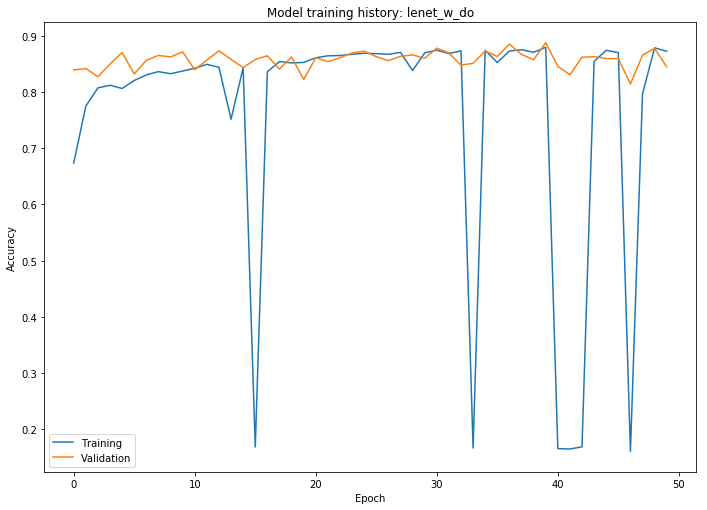

In [21]:
def plot_history(history, modelname):
    plt.figure(figsize=A4_LANDSCAPE)
    plt.title('Model training history: {}'.format(modelname))
    plt.plot(history)
    plt.legend(['Training', 'Validation'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.show()

plot_history(history, 'lenet_w_do')

In [22]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print('Test accuracy: {:.3f}%'.format(evaluate(x_test_n, y_test) * 100))

    softmax = tf.nn.softmax(logits)
    t_pred = None
    for x_batch, y_batch in generator(x_test_n, y_test, batch_size):
        top_softmax = sess.run(tf.nn.top_k(softmax, k=3), feed_dict={x: x_batch, y: y_batch, kp: 1.0})
        if t_pred is None:
            t_pred = top_softmax[1]
        else:
            t_pred = np.concatenate([t_pred, top_softmax[1]])
    correct = np.sum([1 for t_pred, actual in zip(t_pred, y_test) if actual in t_pred])
    print('Top-3 test accuracy: {:.3f}%'.format(100 * correct / len(y_test)))

INFO:tensorflow:Restoring parameters from .\lenet_w_do.ckpt
Test accuracy: 84.529%
Top-3 test accuracy: 93.302%


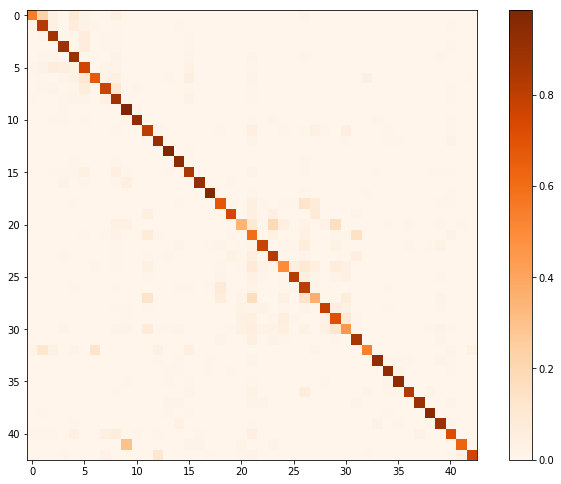

In [23]:
cm = confusion_matrix(y_test, t_pred[:, 0])
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]  # Normalize
plt.figure(figsize=A4_LANDSCAPE)
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Oranges)
plt.colorbar()